# Logistic Regression with Python
Logistic Regression is one of the most widely used supervised machine learning algorithm. This algorithm is used to find the likelihood of an event happening or choice being made. In this project, I have used <b><i>Stroke</i></b> dataset. The aim of this project is to predict the <b><i>Stroke</i></b> based on the applied explanatory variables.

## 1. Introduction to Logistic Regression
Machine learning algorithms are mostly categorized into two groups, supervised and unsupervised learning. These can be differentiated with the help of dependent or target variable. In supervised learning, a machine predict the output based on the given well labelled trained data.<br><br>
Logistic Regression is a type of regression analysis which is used to predict the probability of binary event occurring. We get binary outcome based on the series of variables we apply. Among the two varibles which is used in this algorithm, one is called an independent or explanatory variable whereas the other is said to be dependent or target variable. 

## 2. Terminologies

### Confusion matrix
It is a table in logistic regression which tells about the performance of a classification model. It is simply a graph of predictions from the model and its associated values.<br><br>Some metrics which comes from confusion matrix are given below.<br><br><b>Accuracy</b> - It is just a proportion of predictions that a model classified correctly.<br><b>Precision</b> - It is a ratio of correctly predicted positive observations to total positive observations.<br><b>Recall</b> - It is also known as sensitivity, hit rate, or the true positive rate (TPR). It is a ratio of correctly predicted positive observations to total observations in actual positive class.<br><b>F1 Score</b> - It measures test's accuracy. It is a weighted average of <b><i>Precision</i></b>  and <b><i>Recall</i></b>.

### AUC ROC Curve
In classification problem, performance measurement is done in AUC(Area Under the Curve) - ROC(Receiver Operating Characteristics) Curve. In other words, it is just a visualization of multi-class classifiction problem. Here, we plot the graph of multiple classification model and compare their performance.<br><br>Basically, ROC is the probability curve and AUC is the degree of separability. Higher the AUC, the better the model is at prediction.

## 3. The problem statement
In this project, I am going to predict the output based on the given input. I have used <b><i>Stroke</i></b> dataset in this project. Mainly, the aim of this project is to predict whether a person gets stroke or not based on the given input data such as <b><i>gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi and smoking_status</i></b>. 

## 4. Dataset description
In this project, <b><i>Stroke</i></b> dataset has been used which was downloaded from kaggle.com. You can find the dataset at the following url :<br><br>https://www.kaggle.com/rishabh057/healthcare-dataset-stroke-data<br><br>
This dataset contains details of about people of certain ages. In this dataset, there are 12 columns in total. The <b><i>gender</i></b> variable contains gender type, whereas <b><i>age</i></b> consists of values representing the ages of people. Similarly, <b><i>ever_married</i></b> tells whether a person is married or not, and <b><i>Residence_type</i></b> gives the information about the type of place where a person resides. Likewise, health details can be found on <b><i>hypertension</i></b> , <b><i>bmi</i></b> and <b><i>heart_disease</i></b> columns. Finally, <b><i>stroke</i></b> tells whether a person is having storke or not.

## 5. Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, classification_report, confusion_matrix, roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## 6. Ignore warnings

In [3]:
import warnings
warnings.filterwarnings('ignore')

## 7. Import dataset

In [4]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

## 8. Data analysis

### Shape of dataset

In [5]:
data.shape

(5110, 12)

Here, we can see that there are 12 attributes and 5110 instances in the dataset. We have to see some more details about the dataset. Hence, we are going to see the first 5 instances of the dataset.

### Preview the dataset

In [6]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


### Summary of dataset

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


From the above information, we can see that there are 12 columns in the dataset, each columns having values of different types. All together, there 3 types of data present in our dataset.<br><br>The columns are classified based on the types of data it holds.<br>Float - <b><i>age, avg_glucose_level, bmi</i></b><br>Int - <b><i>id, hypertension, heart_disease, stroke</i></b><br>Object - <b><i>gender, ever_married, work_type, Residence_type, smoking_status</i></b>

### Copy data in another variable

In [8]:
dataSet = data

From here, we are going to perform all the operation on dataSet.

### Check for missing values in dataset

In [9]:
dataSet.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

We can see that one column <b><i>bmi</i></b> contains 201 vaules. Hence, we are going to manipulate it in <b><i>Data Cleaning</i></b> section.

## 9. Data Visualization

### Gender Count

Text(0.5, 1.0, 'Frequencies of Gender')

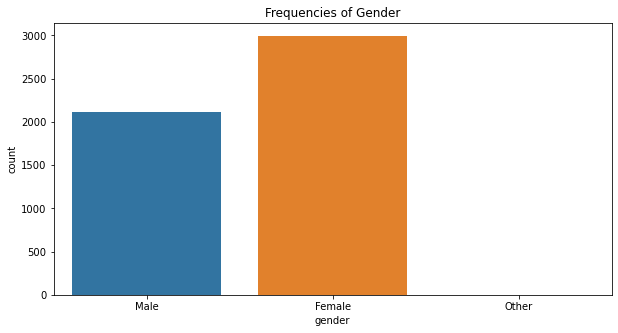

In [10]:
plt.figure(figsize = (10, 5))
sns.countplot(dataSet['gender'])
plt.title('Frequencies of Gender')

In the above figure, we find that the largest proportion of people are female followed by male which is around 2100. However, very few people belongs to other category.

### Work details

Text(0, 0.5, 'Frequencies of Works')

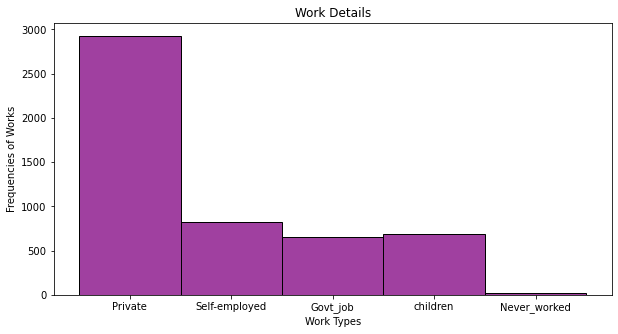

In [11]:
plt.figure(figsize = (10, 5))
sns.histplot(x ="work_type", data=dataSet, color='purple')
plt.title('Work Details')
plt.xlabel('Work Types')
plt.ylabel('Frequencies of Works')

In the above histogram, around 2900 people are working in <b>private</b> company. As we can see alomst equal amount of people are having <b>Gov_job</b> and <b>Children</b> . However, very few people have never worked.

### Age and Stroke Relationship

Text(0, 0.5, 'Stroke')

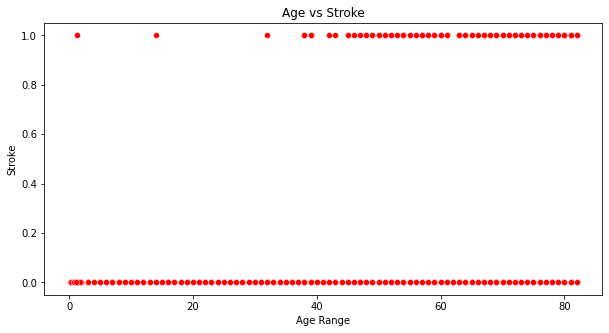

In [12]:
plt.figure(figsize = (10, 5))
sns.scatterplot(x = dataSet['age'], y = dataSet['stroke'], color = 'red')
plt.title('Age vs Stroke')
plt.xlabel('Age Range')
plt.ylabel('Stroke')

From the above figure, we can see that people who is more than 40 years old tends to suffer from stroke.

## 10. Data Cleaning and Preparation

### Fill missing values in the dataset
We have found some null values in bmi column earlier. Hence, we are going to fill it.

In [13]:
dataSet['bmi']=dataSet['bmi'].fillna(dataSet['bmi'].mean())

The missing cells are filled by calculating the average of values present in  the particular column.

### Again check for missing value

In [14]:
dataSet.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

Now, there are no any missing values in our dataset.

### Drop redundant columns from dataset

In [15]:
dataSet.drop(columns=['id'], axis=1, inplace=True)

### Summary of dataset

In [16]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


We have removed the unnecessary columns from the dataset. Now, there are only 11 columns present in our dataset. There are 3 attributes which are of type object, 3 are of type int64 and the remaining are of type float64.

### Binary label encoding

Below, we are going to convert the categorical data into numeric one.

In [17]:
dataSet['ever_married'] = dataSet['ever_married'].replace({'Yes':1, 'No':0})

In [18]:
dataSet['Residence_type'] = dataSet['Residence_type'].replace({'Urban':1, 'Rural':0})

### View summary of dataset

In [19]:
dataSet.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,Female,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1


### Checking unique values 

In [20]:
# check for unique values of gender column
dataSet.gender.unique()

array(['Male', 'Female', 'Other'], dtype=object)

In [21]:
# check for unique values of work_type column
dataSet.work_type.unique()

array(['Private', 'Self-employed', 'Govt_job', 'children', 'Never_worked'],
      dtype=object)

In [22]:
# check for unique values of smoking_status column
dataSet.smoking_status.unique()

array(['formerly smoked', 'never smoked', 'smokes', 'Unknown'],
      dtype=object)

### One Hot Encoding

In [23]:
# splits columns into multiple columns and store in temporary variables
temp_gender = pd.get_dummies(dataSet['gender'], prefix='Gender')
temp_work = pd.get_dummies(dataSet['work_type'], prefix='WorkType')
temp_status = pd.get_dummies(dataSet['smoking_status'], prefix='SmokingStatus')

### Checking values in temporary variables

In [24]:
temp_gender

,Gender_Female,Gender_Male,Gender_Other
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
5105,1,0,0
5106,1,0,0
5107,1,0,0
5108,0,1,0


In [25]:
temp_work

,WorkType_Govt_job,WorkType_Never_worked,WorkType_Private,WorkType_Self-employed,WorkType_children
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0
...,...,...,...,...,...
5105,0,0,1,0,0
5106,0,0,0,1,0
5107,0,0,0,1,0
5108,0,0,1,0,0


In [26]:
temp_status

,SmokingStatus_Unknown,SmokingStatus_formerly smoked,SmokingStatus_never smoked,SmokingStatus_smokes
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
5105,0,0,1,0
5106,0,0,1,0
5107,0,0,1,0
5108,0,1,0,0


### Adding values to dataset

In [27]:
dataSet = pd.concat([dataSet, temp_gender], axis=1)
dataSet = pd.concat([dataSet, temp_work], axis=1)
dataSet = pd.concat([dataSet, temp_status], axis=1)

Here, we have joined the resulted columns into our dataset.

### Preview summary of dataset again

In [28]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   gender                         5110 non-null   object 
 1   age                            5110 non-null   float64
 2   hypertension                   5110 non-null   int64  
 3   heart_disease                  5110 non-null   int64  
 4   ever_married                   5110 non-null   int64  
 5   work_type                      5110 non-null   object 
 6   Residence_type                 5110 non-null   int64  
 7   avg_glucose_level              5110 non-null   float64
 8   bmi                            5110 non-null   float64
 9   smoking_status                 5110 non-null   object 
 10  stroke                         5110 non-null   int64  
 11  Gender_Female                  5110 non-null   uint8  
 12  Gender_Male                    5110 non-null   u

In [29]:
dataSet.drop(columns=['gender', 'work_type', 'smoking_status'], axis=1, inplace=True)

Now, we have to delete the columns which contains the values of object type. This is because we have been able to filter the data from it and stored in new columns. Hence, we are going to use it for further processing.

### Preview the summary of dataset

In [30]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            5110 non-null   float64
 1   hypertension                   5110 non-null   int64  
 2   heart_disease                  5110 non-null   int64  
 3   ever_married                   5110 non-null   int64  
 4   Residence_type                 5110 non-null   int64  
 5   avg_glucose_level              5110 non-null   float64
 6   bmi                            5110 non-null   float64
 7   stroke                         5110 non-null   int64  
 8   Gender_Female                  5110 non-null   uint8  
 9   Gender_Male                    5110 non-null   uint8  
 10  Gender_Other                   5110 non-null   uint8  
 11  WorkType_Govt_job              5110 non-null   uint8  
 12  WorkType_Never_worked          5110 non-null   u

## 11. Preprocessing and modeling

### Declare feature and target variable

In [31]:
# store values from column stroke
Y = dataSet['stroke']

# store values from remaining column
X = dataSet.drop(['stroke'], axis = 1)

# checking for values
X.shape, Y.shape

((5110, 19), (5110,))

### Data Split
We are going to split the data into 80:20 ratio. That means 80% of the data are given to train the model and remaining 20% data are used for testing.

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [33]:
# check for no. of rows present in training section
print(x_train.shape)
print(y_train.shape)

(4088, 19)
(4088,)


In [34]:
# check for no. of rows present in testing section
print(x_test.shape)
print(y_test.shape)

(1022, 19)
(1022,)


In [35]:
x_train.describe()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,Gender_Female,Gender_Male,Gender_Other,WorkType_Govt_job,WorkType_Never_worked,WorkType_Private,WorkType_Self-employed,WorkType_children,SmokingStatus_Unknown,SmokingStatus_formerly smoked,SmokingStatus_never smoked,SmokingStatus_smokes
count,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000,4088.000000
mean,43.438865,0.099315,0.054305,0.659491,0.510029,106.255262,28.904799,0.588307,0.411448,0.000245,0.133562,0.003425,0.568004,0.160959,0.134051,0.300636,0.174168,0.369374,0.155822
std,22.665445,0.299121,0.226647,0.473938,0.499961,45.301823,7.834275,0.492200,0.492156,0.015640,0.340222,0.058427,0.495414,0.367538,0.340749,0.458591,0.379301,0.482694,0.362731
min,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,10.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25.000000,0.000000,0.000000,0.000000,0.000000,77.197500,23.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,45.000000,0.000000,0.000000,1.000000,1.000000,92.040000,28.400000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,61.000000,0.000000,0.000000,1.000000,1.000000,114.165000,32.800000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,82.000000,1.000000,1.000000,1.000000,1.000000,271.740000,97.600000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Normalize the data
This is required in order to minimize the values. As you can see, we have some mean and standard deviation values which is way too much higher.

In [36]:
stn = StandardScaler()

In [37]:
x_train_stn = stn.fit_transform(x_train)
x_test_stn = stn.transform(x_test)

In [38]:
x_train_stn

array([[-0.32824306, -0.33206349, -0.23963241, ...,  2.17751533,
        -0.76532697, -0.42963261],
       [-0.41649391, -0.33206349, -0.23963241, ...,  2.17751533,
        -0.76532697, -0.42963261],
       [ 0.73076708, -0.33206349, -0.23963241, ..., -0.45923902,
         1.30663108, -0.42963261],
       ...,
       [ 0.02476032, -0.33206349, -0.23963241, ..., -0.45923902,
        -0.76532697,  2.32757007],
       [-0.9901244 , -0.33206349, -0.23963241, ...,  2.17751533,
        -0.76532697, -0.42963261],
       [ 0.64251624,  3.01147232, -0.23963241, ..., -0.45923902,
         1.30663108, -0.42963261]])

In [39]:
x_test_stn

array([[ 1.70152638, -0.33206349,  4.17305816, ..., -0.45923902,
        -0.76532697,  2.32757007],
       [-1.74025658, -0.33206349, -0.23963241, ..., -0.45923902,
        -0.76532697, -0.42963261],
       [ 0.64251624, -0.33206349, -0.23963241, ..., -0.45923902,
         1.30663108, -0.42963261],
       ...,
       [ 0.3777637 , -0.33206349, -0.23963241, ..., -0.45923902,
        -0.76532697, -0.42963261],
       [ 1.52502469, -0.33206349, -0.23963241, ...,  2.17751533,
        -0.76532697, -0.42963261],
       [-0.37236848, -0.33206349, -0.23963241, ...,  2.17751533,
        -0.76532697, -0.42963261]])

Now, our data is ready for processing.

### Model preparation
A model is created and it is trained in this section. For this it is provided with a set of well labelled data which we have prepared earlier.

In [40]:
model = LogisticRegression()

In [41]:
# model training
model.fit(x_train_stn, y_train)

LogisticRegression()

In [42]:
y_predict = model.predict(x_test_stn)

In the above code, model is provided with a set of inputs for testing J(i.e normalized data) and is made to predict the output. These outputs are available in <b><i>y_predict</i></b> variable.

In [43]:
# checking y_predict values
y_predict

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

## 12. Finding result and accuracy
Here, we are going to find the accuracy score. In addition to it, we will show the recall score, precision score and f1 score in classification report.

In [44]:
accuracy = accuracy_score(y_test, y_predict)
print(f"Accuracy score: {accuracy}")

Accuracy score: 0.9481409001956947


In [45]:
print(confusion_matrix(y_test, y_predict))

[[968   0]
 [ 53   1]]


In [46]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       968
           1       1.00      0.02      0.04        54

    accuracy                           0.95      1022
   macro avg       0.97      0.51      0.50      1022
weighted avg       0.95      0.95      0.92      1022



### Compute ROC AUC and ROC curve

#### Calculate AUC ROC Score

In [47]:
score = roc_auc_score(y_test, y_predict)
print(f"AUC ROC score : {score}")

AUC ROC score : 0.5092592592592593


#### Calculate ROC curve

In [48]:
false_positive_rate, true_positive_rate, _ = roc_curve(y_test, y_predict)

## 13. Plotting the ROC curve

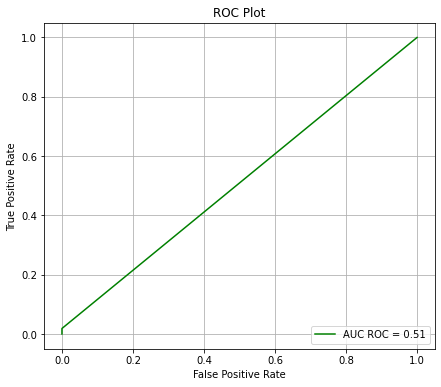

In [52]:
# figure size
plt.figure(figsize = (7, 6))

plt.plot(false_positive_rate, true_positive_rate, color = 'green',  label = 'AUC ROC = %0.2f' % score)

# show legend
plt.legend(loc = 'lower right')

# show gridline
plt.grid()

# title
plt.title('ROC Plot')

# label axis
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# show plot
plt.show()

## 14. Conclusion
In this project, I have implemented one of the most popular supervised machine learning algorithm known as <b><i>Logistic Regression</i></b>.<br><br>I find that the model has accuracy score above 0.9.